# Analysis of the Top Ranked Open Data Datasets

##### By Jessica Wheeler, City of Fort Worth

--------------------------------------------------------------------------

## Introduction 

The Open, Public, Electronic, and Necessary, or OPEN Government Data Act is a bill that aims to publish government data assets as machine-readable data and make that data available without cost to the public. To join in this OPEN data initiative, the City of Fort Worth is making an effort to publish more governmental datasets.

My goal was to collect information on various cities that have published datasets, specifically to see which datasets had the most hits or number of views.  This information would help us determine what subject of dataset would be most useful when published.

---

### The Dataset

In order to prioritize which datasets should be made available first, I sought out to gather the metadata on which current open datasets were the most viewed.  Starting from data.gov, I used their list of cities that are part of the initiative to navigate to each City's respective Open Data websites.  I then sorted the datasets according to "Most Accessed" and created my own dataset that included the City, State, Title of Dataset, Subject, and # of Hits.  I determined the Subject column by looking at the dataset tags.

A lot of the cities with Open Data pages used Socrata as their platform to share the datasets.  There were a handful of cities that used other applications such as ckan, Junar, and civicapps to share their datasets but these apps did not include metadata on how many times a certain dataset was viewed or downloaded.  Thus, I omitted those cities (there were less than 10) and only collected datasets that had the complete information I was looking for.


### Analysis

To start, I imported the dataset I created and viewed the information.  Shown below is the complete dataset.  I was able to gather information from 26 total Cities or Counties that had Open Data websites.  First I looked at the Top Datasets by Subject and then the Top 5 Datasets for Each City.  Then, I show the Top 10 Most Accessed Datasets followed by a look at the Attributes, or columns, to give us information about what's in the datasets, by subject.

In [142]:
#Load the Ranked Open Data Dataset and requires packages.

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

#Read in the CSV file
df = pd.read_csv('https://raw.githubusercontent.com/jessicawheeler/OpenDataCFW/master/RankedOpenDatasetsCLEAN%20-%20Sheet1%20(1).csv')

#Get information on the dataset itself.
df.info()

#Clean up the column headers
df.columns = [x.strip().replace(' ', '') for x in df.columns]

#Change #ofHits from an object to a numeric
df['#ofHits'] = df['#ofHits'].str.replace(',', '')
df['#ofHits'] = df['#ofHits'].astype(float)
df['#ofHits'] = df['#ofHits'].astype('int64')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 5 columns):
City           135 non-null object
State          135 non-null object
Top Dataset    135 non-null object
Subject        134 non-null object
# of Hits      135 non-null object
dtypes: object(5)
memory usage: 5.3+ KB


In [143]:
#Let's view the Entire Dataset:
df

,City,State,TopDataset,Subject,#ofHits
0,Fort Worth,TX,Development Permits,Permits,36111
1,Dallas,TX,DPD Active Calls for Northeast Division,Police Department,538542
2,Austin,TX,Top-10-Searches-Chart,City,119854
3,San Francisco,CA,Film Locations in San Francisco,City,97972
4,New Orleans,LA,Code Enforcement Hearings Detail,Code,43282
5,Seattle,WA,Road Weather Information Stations,Transportation,188978
6,Somerville,MA,311 Consituent Services Daily Calls,City,2339
7,Edmonton,Canada,Traffic Disruptions - Map View,Transportation,113528
8,Belleville,IL,Belleville Crime Blotter,Police Department,1004
9,Baltimore,MD,Baltimore Fixed Speed Cameras,Police Department,58118


---
## Top Datasets by Subject

[<matplotlib.text.Text at 0x13767da0>, <matplotlib.text.Text at 0x13503400>]

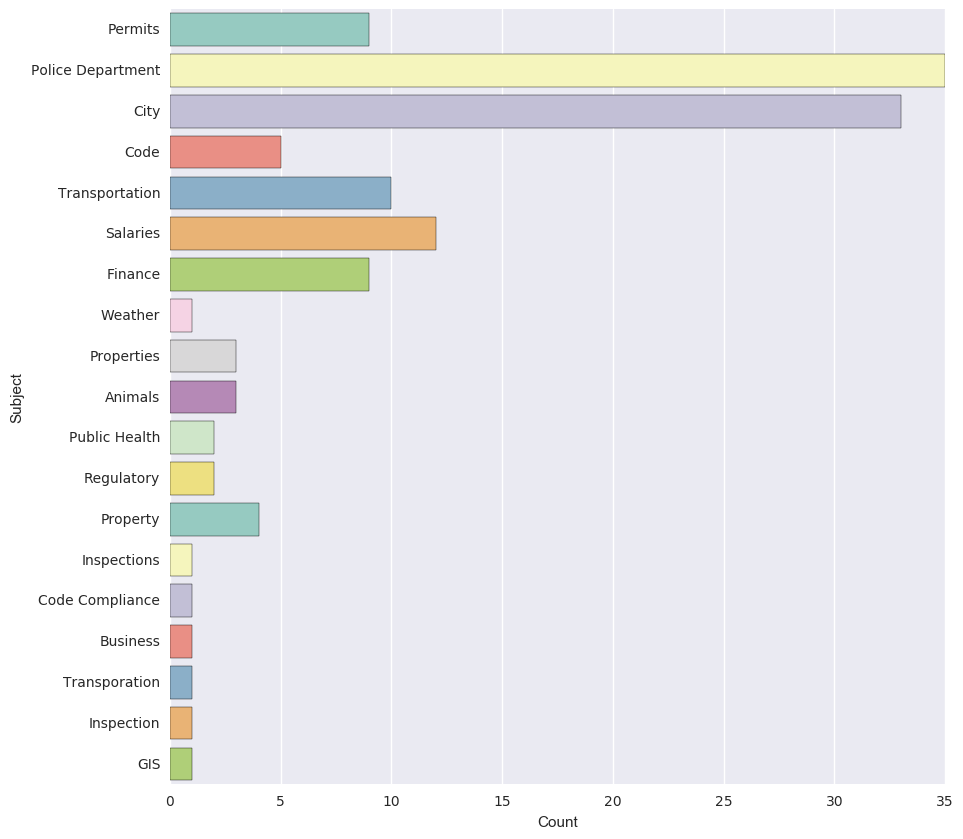

In [144]:
# Resource: http://seaborn.pydata.org/tutorial/categorical.html?highlight=bar%20plots
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(y='Subject', data=df, palette="Set3");
ax.set(xlabel='Count', ylabel='Subject')

Clearly, Police Department data is the most viewed type of dataset, followed by City related datasets.

Let's dive into more specifics..

I gathered the top 5 datasets for each city.  In the version of my dataset that is used here, the #1 top ranked datasets for all cities are listed first.  Following that were the top #2 ranked datasets, and so on until the #5 top ranked dataset for each city.  
The code below separates these ranks so we can see which datasets for each city are #1 to #5, regardless of the overall # of hits (which we will view next).

In [145]:
#Resource: http://pandas.pydata.org/pandas-docs/stable/indexing.html

#Looking at #1 top dataset for each City
df1 = df.copy()
df1 = df1[:27]

#Looking at #2 top dataset for each City
df2 = df.copy()
df2 = df2[28:55]

#Looking at #3 top dataset for each City
df3 = df.copy()
df3 = df3[56:82]

#Looking at #4 top dataset for each City
df4 = df.copy()
df4 = df4[83:109]

#Looking at #5 top dataset for each City
df5 = df.copy()
df5 = df5[110:135]

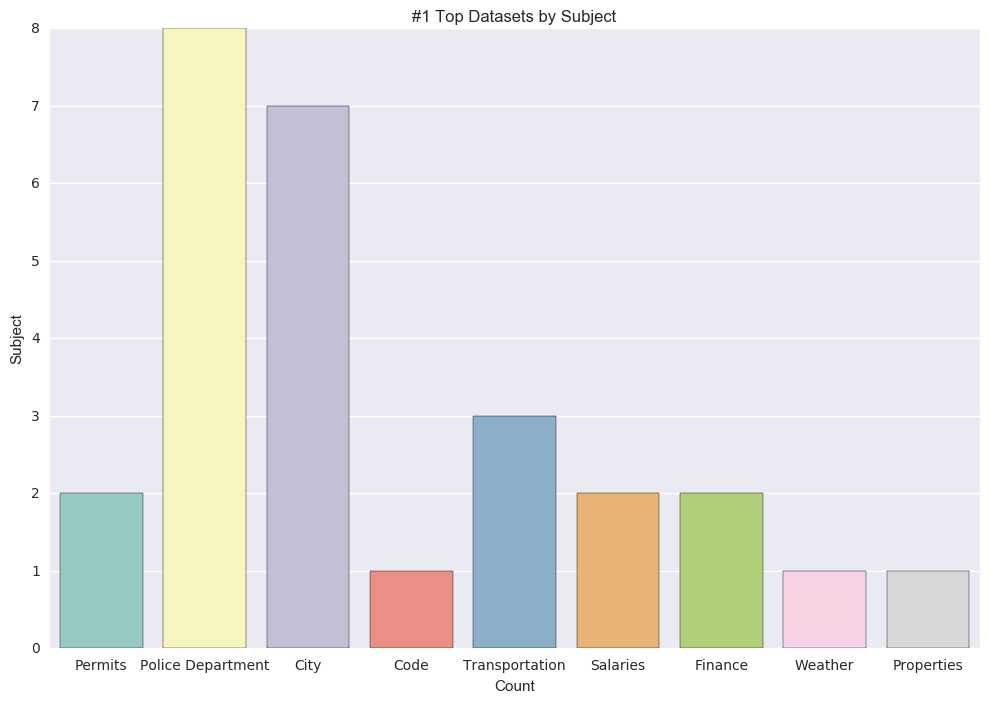

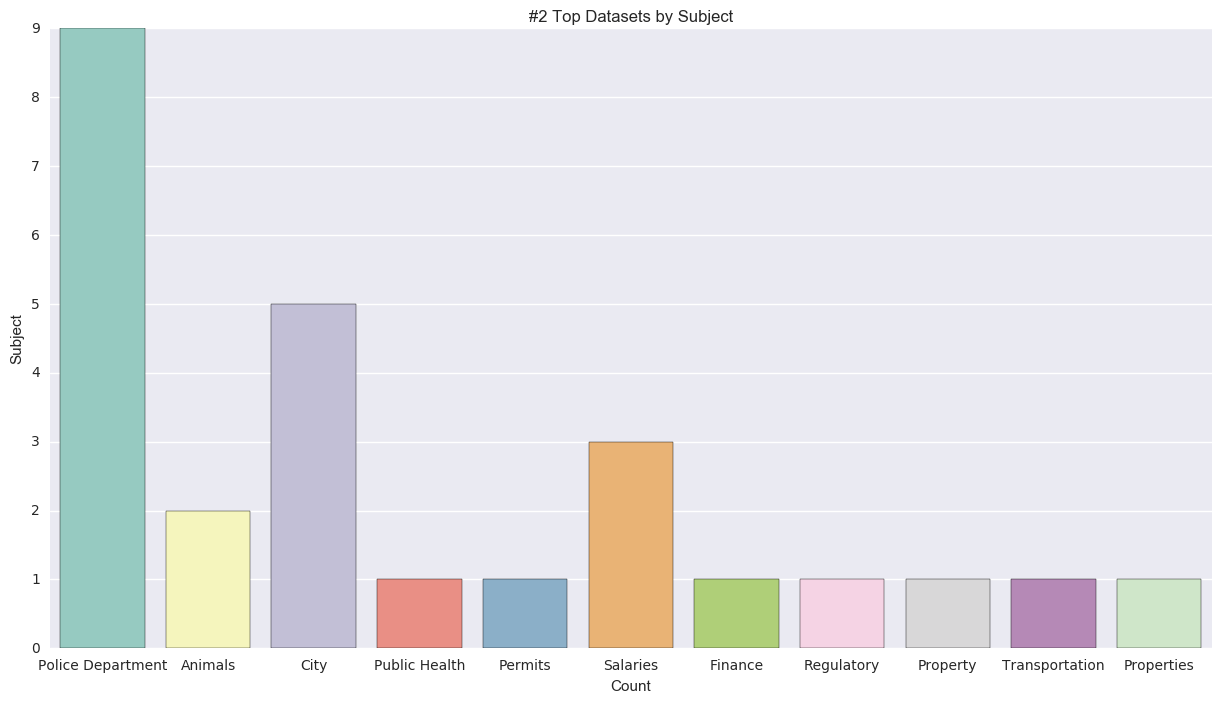

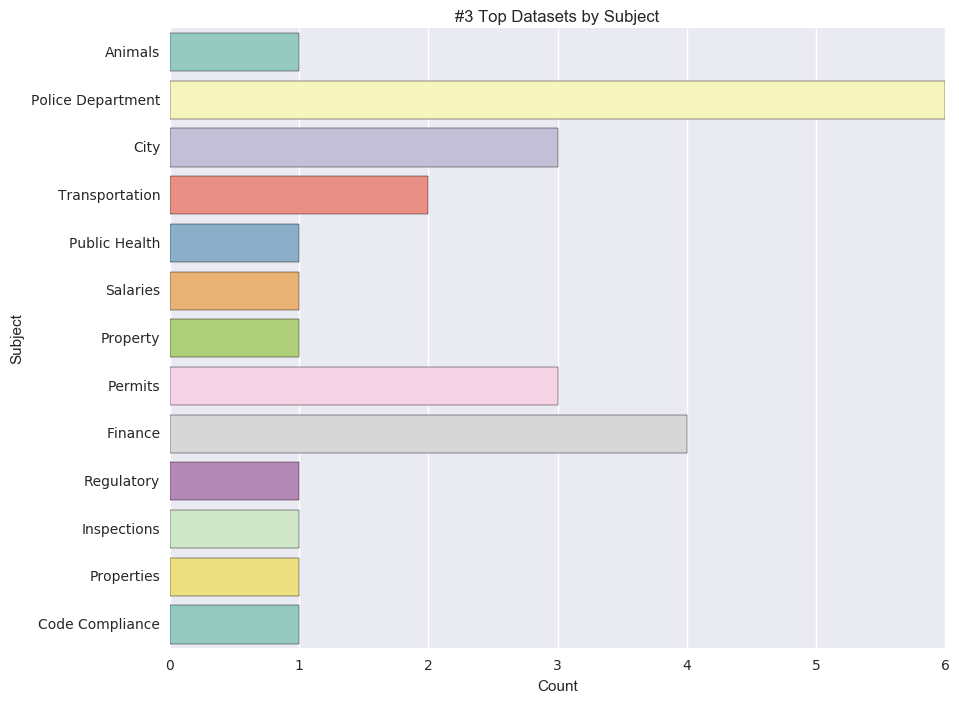

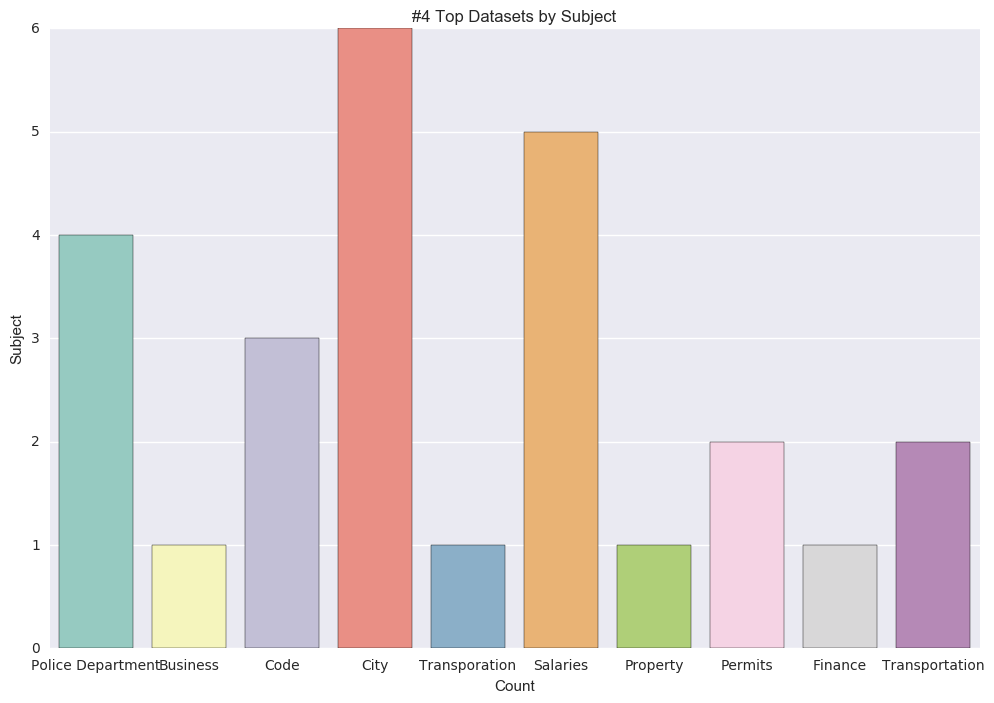

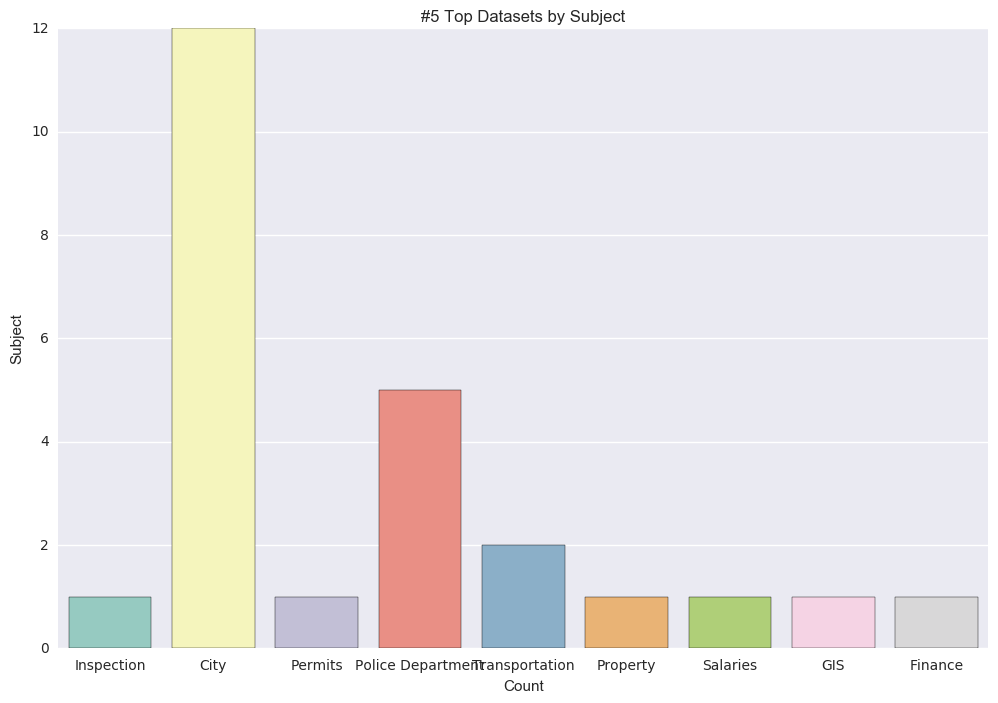

In [169]:
#Create graphs to show counts of Subject.

f, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x='Subject', data=df1, palette="Set3");
ax.set(xlabel='Count', ylabel='Subject')
plt.title("#1 Top Datasets by Subject")

f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Subject', data=df2, palette="Set3");
ax.set(xlabel='Count', ylabel='Subject')
plt.title("#2 Top Datasets by Subject")

f, ax = plt.subplots(figsize=(10, 8))
sns.countplot(y='Subject', data=df3, palette="Set3");
ax.set(xlabel='Count', ylabel='Subject')
plt.title("#3 Top Datasets by Subject")

f, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x='Subject', data=df4, palette="Set3");
ax.set(xlabel='Count', ylabel='Subject')
plt.title("#4 Top Datasets by Subject")

f, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x='Subject', data=df5, palette="Set3");
ax.set(xlabel='Count', ylabel='Subject')
plt.title("#5 Top Datasets by Subject")

From the graphs above we see that the top dataset subjects are:

- #1 PD, City, Transportation
- #2 PD, City, Salaries
- #3 PD, Finance, City/Permits tie
- #4 City, Salaries, PD
- #5 City, PD, Transportation


---


## The Top 10 Most Accessed Datasets

I sorted the dataset by # of Hits and narrowed it down to the top 10 most accessed overall.  From the list below, we can see that Approved Building Permits in Boston had about 7.7 million views. Based on Dataset titles, the first three on the list are city-related.  The last two on the list are Police Department datasets, each with over half a million views.

In [156]:
top10 = df.sort_values(by = '#ofHits', ascending = False)
top10.head(10)

,City,State,TopDataset,Subject,#ofHits
10,Boston,MA,Approved Building Permits,Permits,7738240
22,New York City,NY,DOB Job Application Filings,City,1348673
13,Chicago,IL,"Current Employee Names, Salaries, and Position...",Salaries,803342
16,Kansas City,MS,Local Severe Weather Warning Systems in Missouri,Weather,650159
43,Kansas City,MS,"Missouri Beer, Wine, and Liquor Wholesaler Lis...",Regulatory,618280
49,New York City,NY,New Driver Application Status,Transportation,617800
70,Kansas City,MS,"Missouri Beer, Wine, and Liquor Solicitor List...",Regulatory,610510
97,Kansas City,MS,2011 State Expenditures,City,568899
124,Kansas City,MS,Missouri Law Enforcement Agencies,Police Department,567516
1,Dallas,TX,DPD Active Calls for Northeast Division,Police Department,538542


## Attributes in a Dataset

To get an idea of what types of information are in a given dataset, let's look at the dataset's columns or attributes.  Since the top subjects were Police Department, City, Salaries, Permits, Transportation, and Finance, I've chosen the top datasets for each to import and view attributes.



#### Permits
- Boston, MA: "Approved Building Permits"
- Views: 7,738,240

In [157]:
#Boston Permit Dataset
#Resource https://data.cityofboston.gov/Permitting/Approved-Building-Permits/msk6-43c6
df_permits = pd.read_json('https://data.cityofboston.gov/resource/hfgw-p5wb.json')
df_permits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
:@computed_region_aywg_kpfh    853 non-null float64
address                        999 non-null object
applicant                      985 non-null object
city                           998 non-null object
comments                       1000 non-null object
declared_valuation             1000 non-null float64
description                    987 non-null object
expiration_date                976 non-null object
issued_date                    1000 non-null object
location                       854 non-null object
occupancytype                  995 non-null object
owner                          853 non-null object
parcel_id                      853 non-null float64
permitnumber                   1000 non-null object
permittypedescr                1000 non-null object
property_id                    859 non-null float64
sq_feet                        1000 non-null float64
state           

#### City
- New York, NY: "DOB Job Application Filings"
- Views: 1,348,673

In [158]:
#NY City Dataset
#Resource https://data.cityofnewyork.us/Housing-Development/DOB-Job-Application-Filings/ic3t-wcy2
df_city = pd.read_json('https://data.cityofnewyork.us/resource/rvhx-8trz.json')
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 77 columns):
applicant_license__             1000 non-null int64
applicant_professional_title    1000 non-null object
applicant_s_first_name          1000 non-null object
applicant_s_last_name           1000 non-null object
approved                        435 non-null object
assigned                        688 non-null object
bin__                           1000 non-null int64
block                           1000 non-null int64
boiler                          276 non-null object
borough                         1000 non-null object
building_type                   1000 non-null object
city_                           1000 non-null object
city_owned                      742 non-null object
community___board               1000 non-null int64
curb_cut                        287 non-null object
dobrundate                      1000 non-null object
doc__                           1000 non-null int64
efi

#### Salaries
- Chicago, IL: "Current Employee Names, Salaries, and Position Titles"
- Views: 803,342

In [159]:
#Chicago Salaries Dataset
#Resource https://data.cityofchicago.org/Administration-Finance/Current-Employee-Names-Salaries-and-Position-Title/xzkq-xp2w
df_salaries = pd.read_json('https://data.cityofchicago.org/resource/tt4n-kn4t.json')
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
department                1000 non-null object
employee_annual_salary    1000 non-null float64
job_titles                1000 non-null object
name                      1000 non-null object
dtypes: float64(1), object(3)
memory usage: 31.3+ KB


#### Transportation
- New York, NY: "New Driver Application Status"
- Views: 617,800

In [160]:
#NY Transportation Dataset
#Resource https://data.cityofnewyork.us/Transportation/New-Driver-Application-Status/dpec-ucu7
df_transport = pd.read_json('https://data.cityofnewyork.us/resource/xtra-f75s.json')
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
app_date                   1000 non-null object
app_no                     1000 non-null int64
defensive_driving          1000 non-null object
driver_exam                1000 non-null object
drug_test                  1000 non-null object
fru_interview_scheduled    1000 non-null object
lastupdate                 1000 non-null object
medical_clearance_form     1000 non-null object
other_requirements         1000 non-null object
status                     1000 non-null object
type                       1000 non-null object
wav_course                 1000 non-null object
dtypes: int64(1), object(11)
memory usage: 93.8+ KB


#### Police Department
- Kansas City, MS: "Missouri Law Enforcement Agencies"
- Views: 567,516

In [161]:
#Kansas City PD Dataset
#Resource https://data.mo.gov/Public-Safety/Missouri-Law-Enforcement-Agencies/cgbu-k38b
df_pds = pd.read_json('https://data.mo.gov/resource/evsw-vdkc.json')
df_pds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 11 columns):
agency_type         656 non-null object
ceo_name            656 non-null object
ceo_title           656 non-null object
city                656 non-null object
county_name         656 non-null object
fax_number          633 non-null float64
name                656 non-null object
street_address      656 non-null object
street_address_2    138 non-null object
voice_number        656 non-null int64
zip                 656 non-null int64
dtypes: float64(1), int64(2), object(8)
memory usage: 56.4+ KB


#### Finance
- Cook County, IL: "Procurement- Awarded Contracts & Amendments"
- Views: 64,866

In [162]:
#Cook County Finance Dataset
#Resource https://datacatalog.cookcountyil.gov/Finance-Administration/Procurement-Awarded-Contracts-Amendments/qh8j-6k63
df_finance = pd.read_json('https://datacatalog.cookcountyil.gov/resource/kam9-hugs.json')
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
amount             866 non-null float64
category           1000 non-null object
contract_number    1000 non-null object
description        1000 non-null object
end_date           726 non-null object
lead_department    997 non-null object
link               991 non-null object
start_date         726 non-null object
system_release     1000 non-null object
vendor_name        1000 non-null object
vendor_number      998 non-null float64
dtypes: float64(2), object(9)
memory usage: 86.0+ KB


# Conclusion

Based on this analysis, datasets with subjects Police Depeartment and the City are the most accessed datasets.  Police Datasets included subject areas such as Calls, Crime maps, Arrests, Incident Reports, and Booking information.  City Datasets included subject areas such as 311 Issues, Boundaries, Expenditures, and Maps.

The most accessed dataset to date is the "Approved Building Permits" from Boston, with over 7 million views.  Next was NYC with a Job Application Dataset that had 1.3 million views.  The Dallas and Kansas City Police Department datasets on Law Enforcement Agencies, and Active Calls, respectively had over half a million views.  

Looking at the attributes of the top datasets gave insight as to what information was provided.  The Kansas City PD Dataset on Law Enforcement Agencies provided detailed agency contact information. The Boston Permits dataset provided information on the dates of issued permits as well as when they expire, the total fees, owner, location, and more.  Chicago salary dataset showed an employee's annual salary, name, and job title.
These were some examples of information given by the top datasets.  Thus, the City of Fort Worth can start to gather information from the different departments and seek to publish City information data, salary information, and police department contact and incident information onto their Open Data website.